In [1]:
# Dependencies
import tweepy
import numpy as np
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target_users
for user in target_users:
    
    #Counter 
    counter = 1
    
 
    #Get tweets from  homefeed of all news organizations
    public_tweets = api.user_timeline(user, count = 100)

        #Loop through tweets
    for tweet in public_tweets:

        #Run the Vader sentiment analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for tweets to 'sentiments' list.
        sentiments.append({"Username" : user,
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter})
        #Add to counter.
        counter = counter + 1

In [3]:
#Export the DataFrame to as csv.
news_stats = pd.DataFrame.from_dict(sentiments)
news_stats.to_csv("Twitter_Sentiment_Analysis.csv", index=False)
news_pd= news_stats.set_index("Username")

In [4]:
BBC_comp = news_pd.loc["@BBC", "Compound"]
CBS_comp = news_pd.loc["@CBS", "Compound"] 
CNN_comp = news_pd.loc["@CNN", "Compound"] 
Fox_comp = news_pd.loc["@FoxNews", "Compound"] 
nytimes_comp = news_pd.loc["@NYTimes", "Compound"] 
BBC_comp =BBC_comp.reset_index()
CBS_comp =CBS_comp.reset_index()
CNN_comp =CNN_comp.reset_index()
Fox_comp =Fox_comp.reset_index()
nytimes_comp =nytimes_comp.reset_index()

Comp_df =pd.concat([BBC_comp, CBS_comp, CNN_comp, Fox_comp,nytimes_comp],axis=1)
Comp_df.columns.values[1] = 'BBC Compound' 
Comp_df.columns.values[3] = 'CBS Compound'
Comp_df.columns.values[5] = 'CNN Compound'
Comp_df.columns.values[7] = 'FoxNews Compound'
Comp_df.columns.values[9] = 'NYtimes Compound'


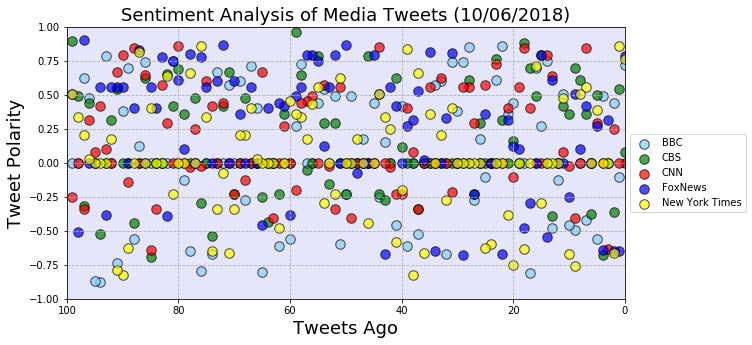

In [5]:
news_fig = plt.figure(figsize=(10,5))

ax = news_fig.add_subplot(111)
ax.set_facecolor('lavender')
BBC = ax.scatter(np.arange(len(Comp_df["BBC Compound"])),
         Comp_df["BBC Compound"], marker="o", color="lightskyblue", edgecolors="black",
         alpha=0.7, s=90 ) 
CBS = ax.scatter(np.arange(len(Comp_df["BBC Compound"])),
         Comp_df["CBS Compound"], marker="o", color="green", edgecolors="black",
         alpha=0.7,s=90)
CNN = ax.scatter(np.arange(len(Comp_df["BBC Compound"])),
         Comp_df["CNN Compound"], marker="o", color="red", edgecolors="black",
         alpha=0.7 ,s=90)
Fox = ax.scatter(np.arange(len(Comp_df["BBC Compound"])),
         Comp_df["FoxNews Compound"], marker="o", color="blue", edgecolors="black",
         alpha=0.7,s=90)
nytimes = ax.scatter(np.arange(len(Comp_df["BBC Compound"])),
         Comp_df["NYtimes Compound"], marker="o", color="yellow", edgecolors="black",
         alpha=0.7,s=90)

now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title("Sentiment Analysis of Media Tweets ({})".format(now), fontsize='18')
plt.ylabel("Tweet Polarity", fontsize='18')
plt.xlabel("Tweets Ago", fontsize='18')
plt.xlim(100,0)
plt.ylim((-1,1))
plt.grid(True, linestyle='dashed')
plt.legend((BBC, CBS, CNN, Fox, nytimes), ("BBC","CBS","CNN","FoxNews","New York Times"),
           loc='lower left',
           bbox_to_anchor=(1, 0.3))
plt.savefig("Sentiment_Analysis_of Media_Tweets")     
plt.show()


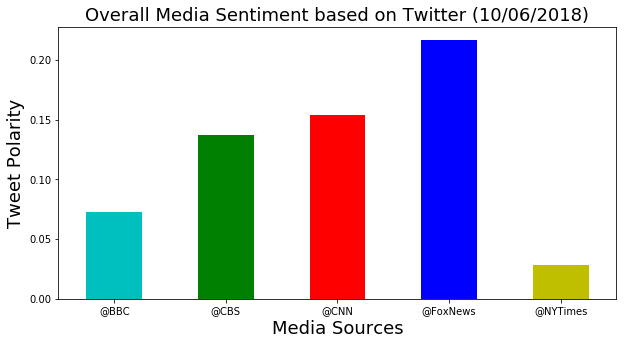

In [6]:
avg_sentiment = news_stats.groupby("Username")["Compound"].mean()
avg_sentiment

#Plot of overall Media Sentiment Analysis
plt.figure(figsize=(10,5))
avg_sentiment.plot(kind='bar',color=['c','g','r','b','y'])

plt.ylabel('Tweet Polarity',fontsize='18')
plt.xlabel('Media Sources',fontsize='18')
plt.xticks(rotation=0)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Twitter ({})'.format(now),fontsize=(18));
plt.savefig("Overall_Media_Sentiment_based_on_Twitter")  